# Stock Data Pull and Plot

This code is meant to pull stock data and plot using matplotlib.

Step 1. Test for 1 ticker symbol  
Step 2. Test for 3 ticker symbols  
Step 3. Test for large list of ticker symbols  
Step 4. Set up to take user input on which ticker symbol to view  

In [79]:
# Import modules
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
# https://pypi.org/project/yfinance/
# import pandas as pd
# from datetime import datetime, timedelta, date
# import time
# from reader import feed
# from pandas.tseries.frequencies import to_offset
# import numpy as np
# from pandas.tseries.offsets import BDay

In [73]:
#start timer
# tic = time.perf_counter()

In [74]:
# Provide list
# tickers = pd.read_csv("Input/stock_tickers.csv") # final script
tickers = ['^GSPC'] # for testing level1
# tickers = ['AAPL','MSFT','AMD'] # for testing level2
# tickers = ['BTC-USD','ETH-USD','LTC-USD'] # for testing level3

In [75]:
# create empty dataframe which the code will append
# dfout = pd.DataFrame()

# primary loop for pulling data, doing calculations, and merging dataframes
# for ticker in tickers:
start_date="2020-01-01"
end_date="2021-01-01"
data = yf.download(tickers, start=start_date, end=end_date)
data.to_csv('Output/stock_data.csv')  # data checkpoint1

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000


In [76]:
# Limit dataset to close prices for charting
close_price = data[['Close']]

# Convert start and end date to datetime for plotting purposes
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')
print(start_date_obj.date())

2020-01-01


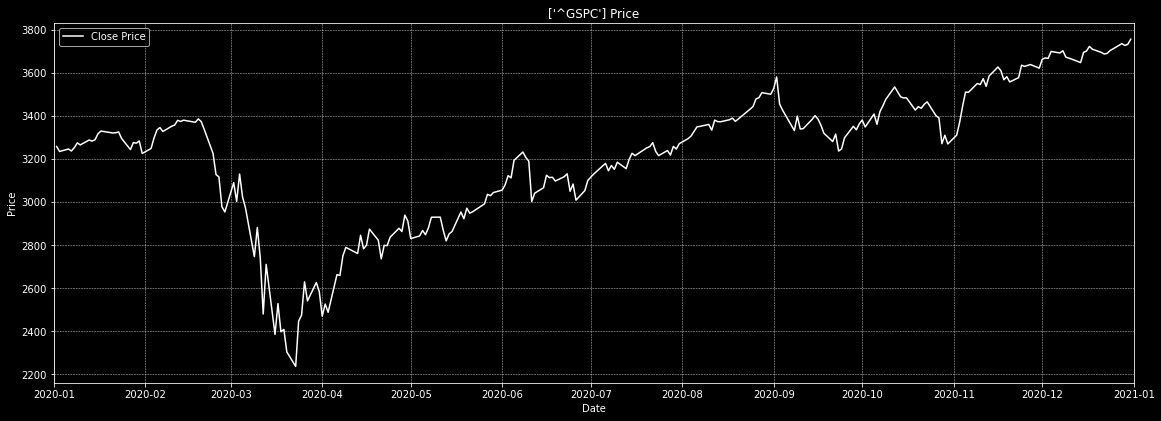

In [82]:
# close_price.plot(kind='line',
#                  figsize=(15,7),
#                  title=f"{tickers} Price Chart",
#                  xlabel="Date",
#                  ylabel="Price ($)",
#                  grid=True)
# close_price.plot(kind='line', title=f"{tickers} Price Chart", grid=True)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax = fig.add_axes([0,0,1,1])
ax.set_title(f'{tickers} Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax.xlim(start_date_obj,end_date_obj)
ax.plot(close_price['Close'],label='Close Price',color='white')
ax.legend()
# plt.style.use('dark_background')
# x=close_price.index
# y=close_price.Close
# plt.plot(x,y)
# plt.xlabel("Date")
# plt.ylabel("Price")
plt.xlim(start_date_obj,end_date_obj)
plt.grid(color='white',linestyle='--',linewidth=0.5,alpha=0.8)
# plt.show()
# plt.tight_layout()

In [ ]:
# End timer to measure computation performance
# toc = time.perf_counter()
# print(f"Total processing time is {toc-tic:0.4f} seconds")